In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [6]:
#describe

df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
# identifying missing values and handling
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']

In [9]:
df = df.drop(columns = unused)
df.shape

(1000, 9)

In [10]:
for cate in categorical:
    df[cate] = df[cate].fillna(df[cate].mode().values[0])

In [11]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

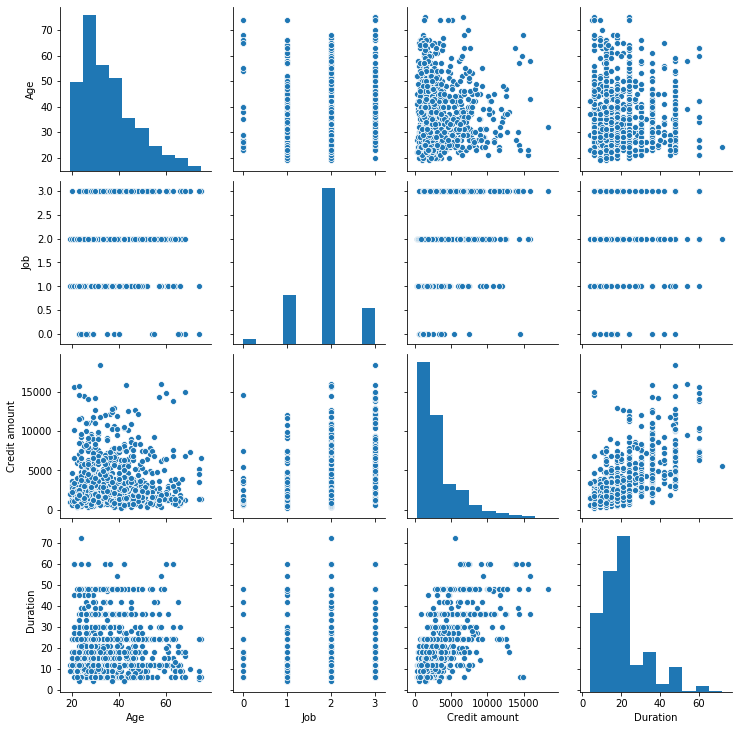

In [13]:
# Visualise the plot

sns.pairplot(df)

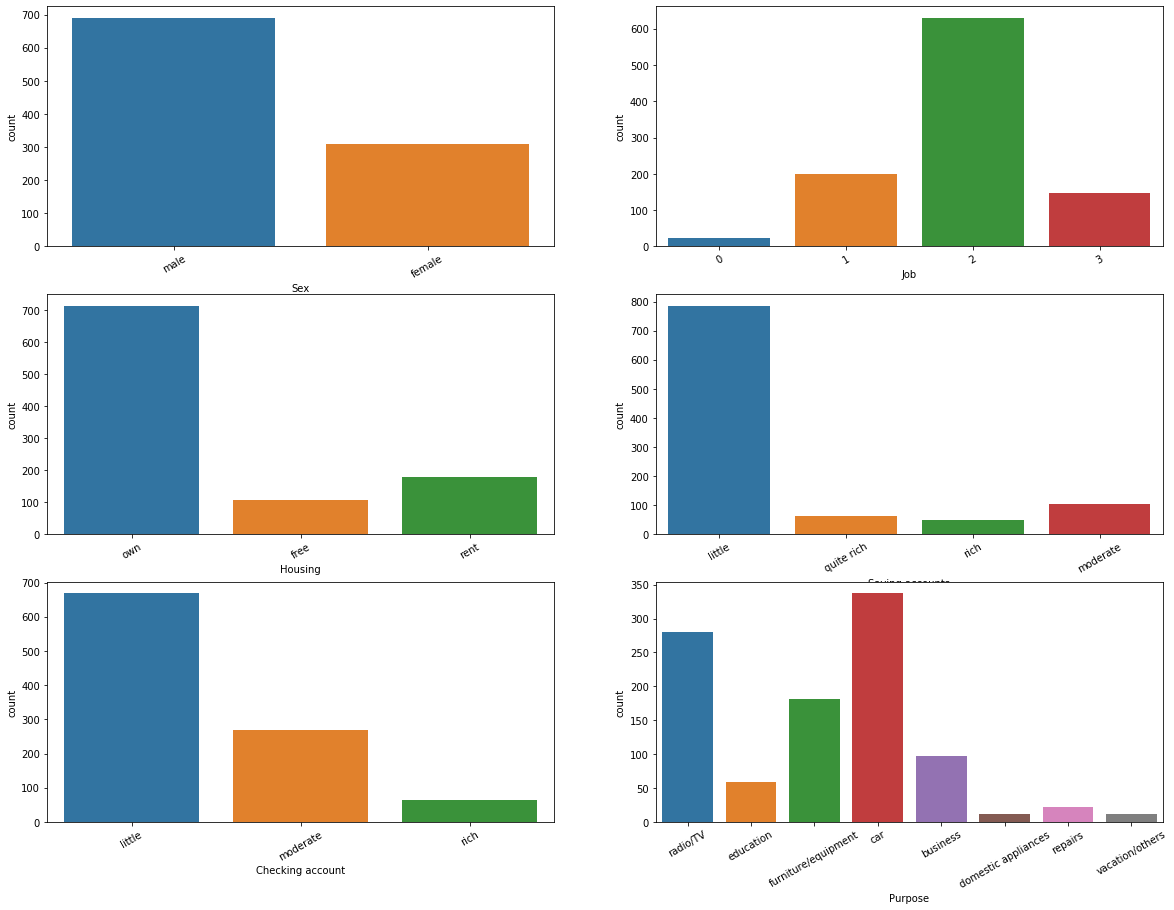

In [14]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()

Above are the bar plot of all the categorical feature. From the bar plot above, we can get some insight. That are:

The amount of men are greater than women
Most of the customer are skilled on their job
Most of the customer have their own house
Most of the customer have little saving account
Most of the customer hav little checking account
Most of the customer use credit for car

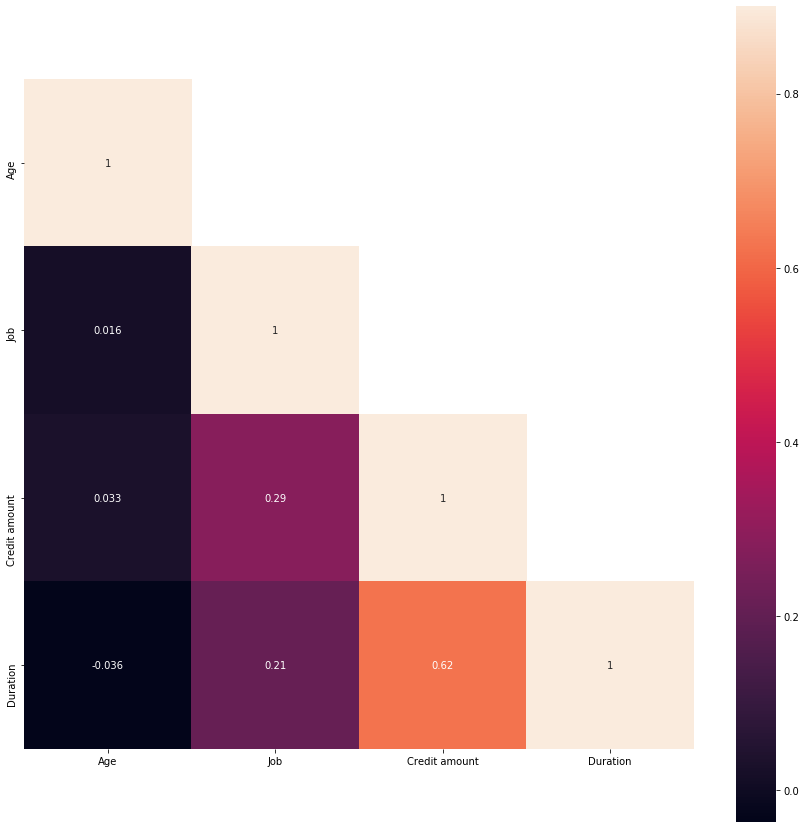

In [15]:
# Create correlation

#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

From the heatmap above we can see that the best correlation is between credit amount and duration. But so far we will still use all the numeric features for the clustering.

In [16]:
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df['Credit amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] = df['Duration']
df_cluster['Job'] = df['Job']
df_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


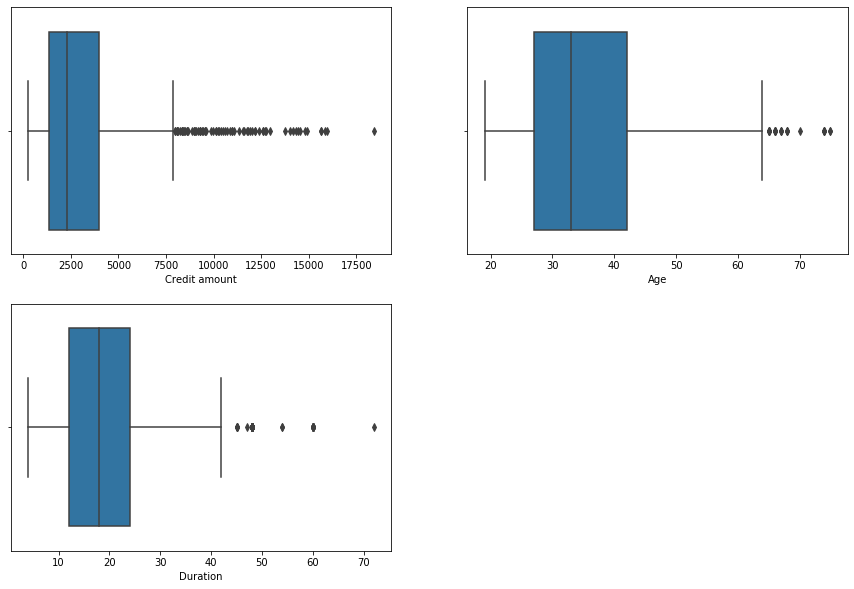

In [17]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

From the above figures we can still see that there are some outliers present



No handles with labels found to put in legend.


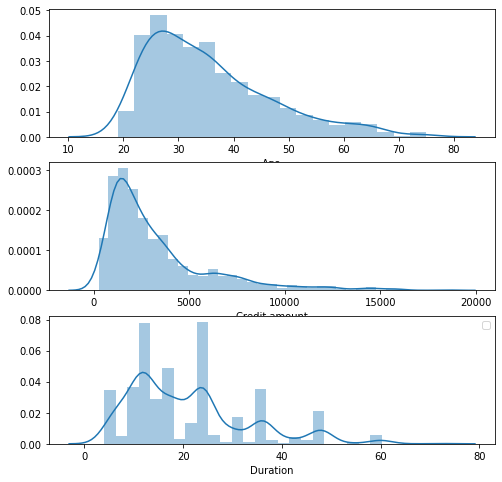

In [87]:
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    #sns.distplot(df["Job"], ax=ax4)
    #plt.tight_layout()
    plt.legend()

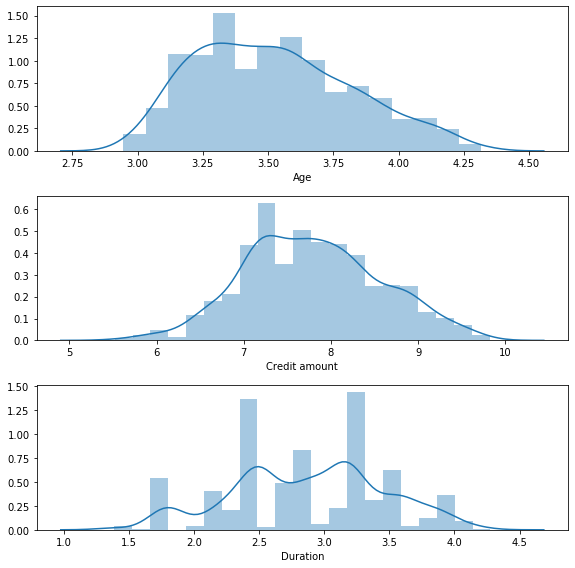

In [22]:
# We can use logarithmic transformation to reduce the outliers and distribution skewness.
df_cluster_log = np.log(df_cluster[['Age', 'Credit amount','Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"], ax=ax3)
plt.tight_layout()

In [23]:
# Fit & Transform
df_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

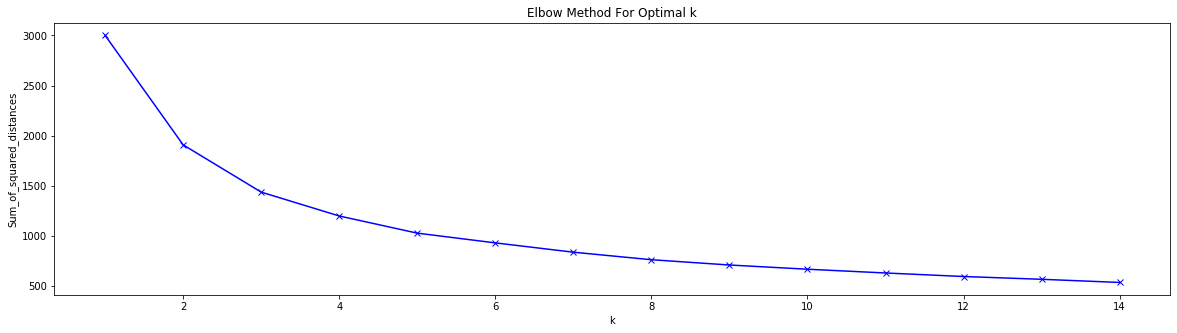

In [25]:
# MOdels
#First, we use Elbow Method to determine the optimal k value for the k-means.
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


We can see the optimum no of clusters as 3

K-Means


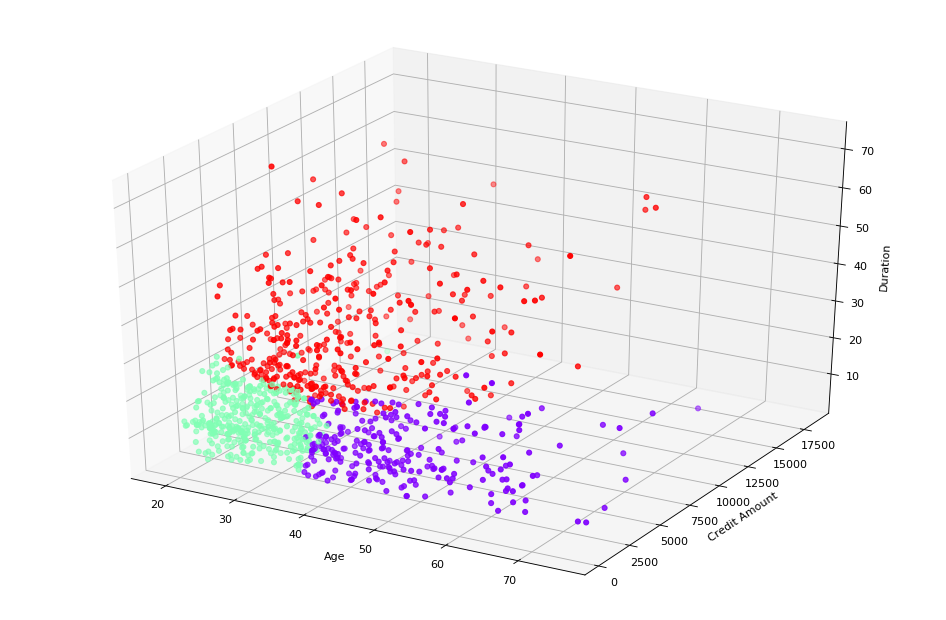

In [26]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [27]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1979.7,48.7,13.9,1.7
1,1732.2,27.8,14.2,1.8
2,5665.4,34.0,32.2,2.1


The table above shows the centroid of each clusters that could determine the clusters rule. These are:

Cluster 0 : Higher credit amount, middle-aged, long duration customers
Cluster 1 : Lower credit amount, young, short duration customers
Cluster 2 : Lower credit amount, old, short duration customers

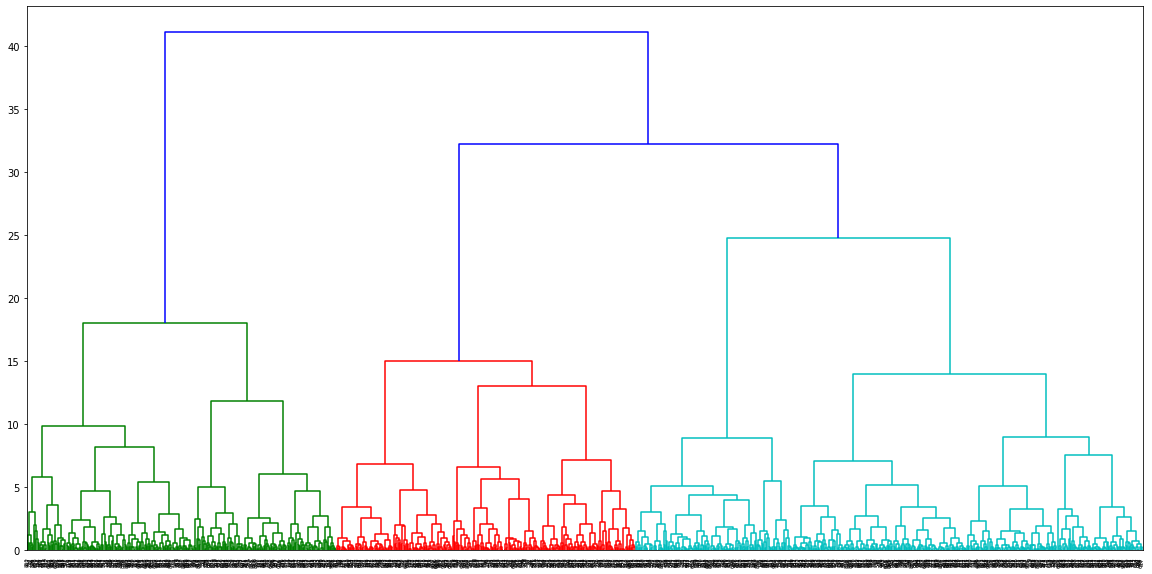

In [28]:
# hierarchical clustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))


 no of optimum clusters is 4

Hierarchical Agglomerative Clustering


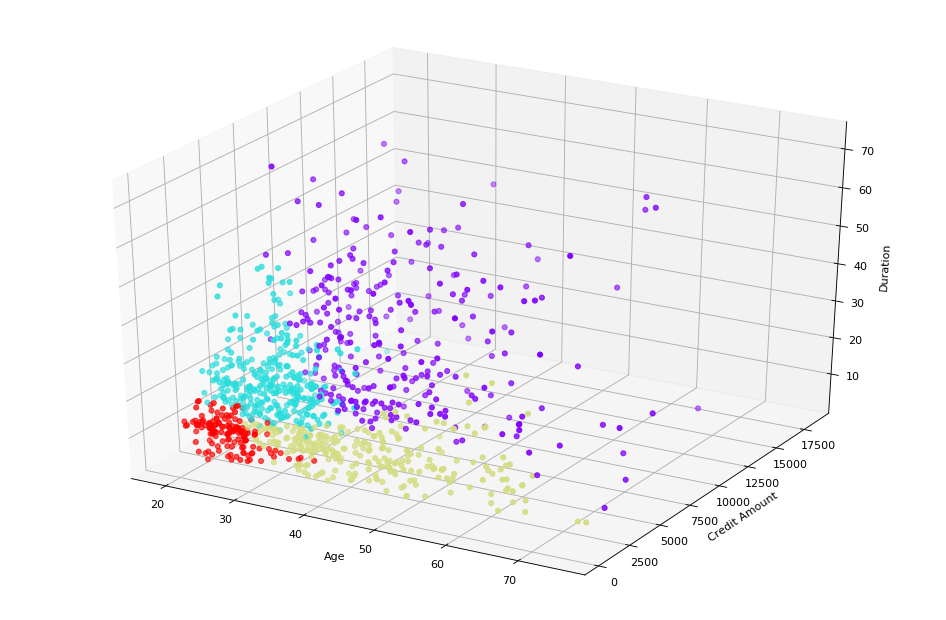

In [29]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [30]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac


,Credit amount,Age,Duration,Job
Cluster,,,,
0,6477.0,40.4,32.0,2.2
1,2748.0,28.8,23.6,1.9
2,1644.1,44.0,11.7,1.7
3,1231.5,25.1,10.6,1.7


The table above shows the centroid of each clusters that could determine the clusters rule. These are:

Cluster 0 : Higher credit amount, old, long duration customers
Cluster 1 : Lower credit amount, young, long duration customers
Cluster 2 : Lower credit amount, old, short duration customers
Cluster 3 : Lower credit amount, young, short duration customers

DBSCAN


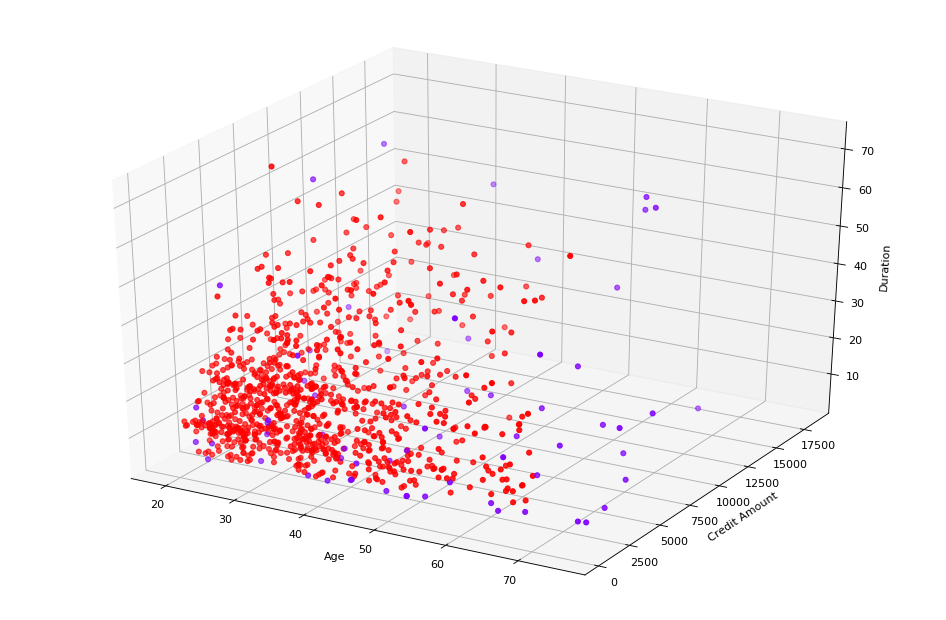

In [31]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(cluster_scaled)
dbs_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=dbs_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("DBSCAN")

# Result analysis

From these models, we can choose the most well segmented model, that is k-means. We use the clusters from the that model to analyze the dataset.

In [32]:
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1979.7,48.7,13.9,1.7
1,1732.2,27.8,14.2,1.8
2,5665.4,34.0,32.2,2.1


In [33]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [34]:
df_clustered

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,2
997,38,male,2,own,little,little,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,2


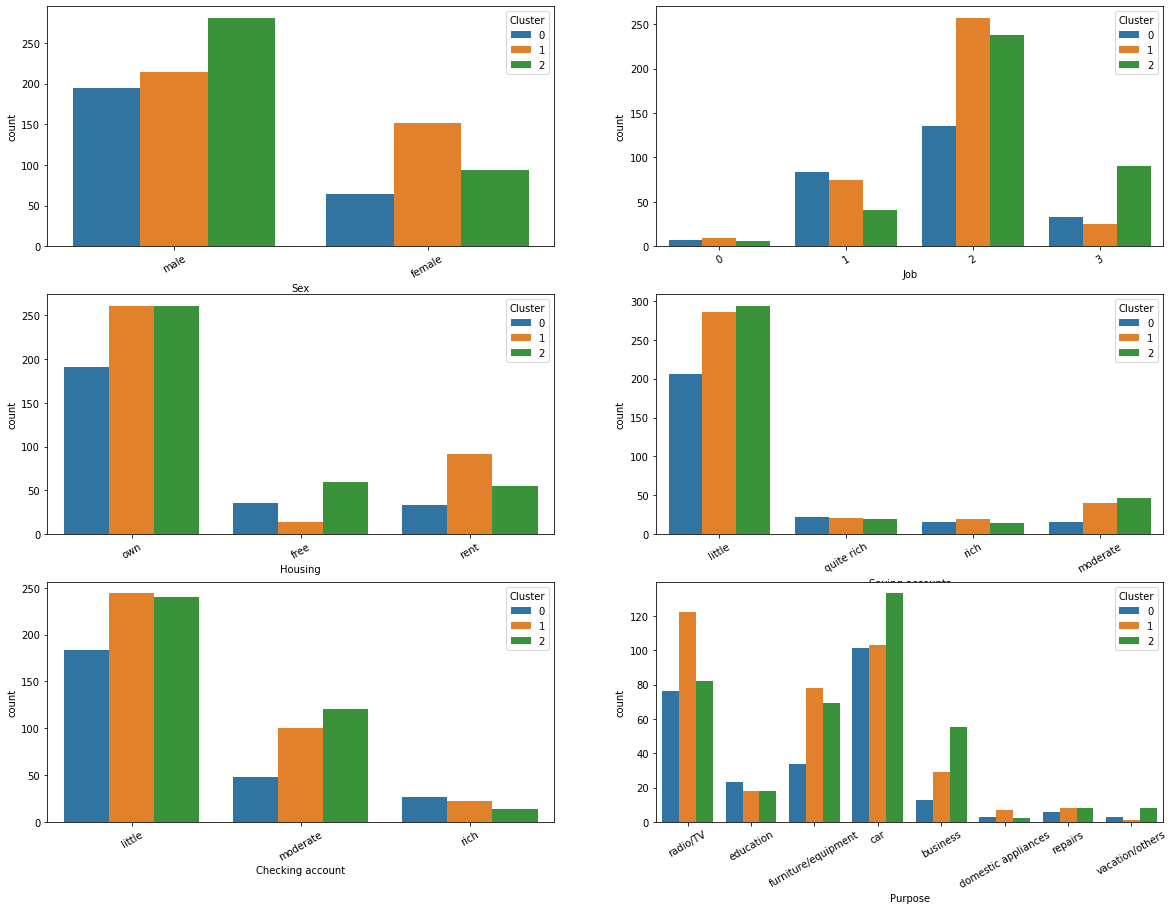

In [35]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered, hue=df_clustered['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

# SUmmaries

After comparing three kind of clustering models, we decide to use k-means as the model
The data divided into three clusters
The three clusters can be used to determine the creditworthiness of the German Credit potential borrowers
Each of the cluster have their own characteristics